In [ ]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline



In [ ]:
# Unbalanced - mean,std,median
parkinson = pd.read_csv('./parkinson/control/C_0001.txt', sep = ';', header = None)

In [ ]:
parkinson

,0,1,2,3,4,5,6
0,200,204,0,73,910,1732647300,0
1,200,204,0,218,900,1732647307,0
2,200,204,0,253,900,1732647314,0
3,200,204,0,304,900,1732647321,0
4,200,204,0,351,900,1732647328,0
...,...,...,...,...,...,...,...
5795,402,200,12,701,520,1732640332,1
5796,402,200,12,623,550,1732640339,1
5797,402,200,12,488,560,1732640346,1
5798,402,199,12,267,600,1732640354,1


In [ ]:
# We are expecting our model to predict parkinson or normal as a result 
# Use Timeseries and find variance std or median out of different features 

In [ ]:
# def pairing(normal_df, seq_length=6):
#     x=[]
#     y=[]
#     for i in range(0, (normal_df.shape[0]-1)//seq_length, seq_length+1):
#         seq= np.zeros((seq_length, normal.shape[1]))
#         for j in range(seq_length):
#             seq[j]= normal_df.values[i+j]
#         x.append(seq)
#         y.append(normal_df['T (degC)'][i+seq_length])
#     return np.array(x), np.array(y)
# x,y = pairing(normal_df)
# print(x.shape)
# print(y)

In [ ]:
parkinson.head()

,0,1,2,3,4,5,6
0,200,204,0,73,910,1732647300,0
1,200,204,0,218,900,1732647307,0
2,200,204,0,253,900,1732647314,0
3,200,204,0,304,900,1732647321,0
4,200,204,0,351,900,1732647328,0


In [ ]:
parkinson.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [ ]:
parkinson2 = pd.read_csv('./parkinson/control/C_0002.txt', sep = ';', header = None)

In [ ]:
parkinson2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [ ]:
# So we have control and parkinson files in folder and the way we can manipulate:
# - Choose sequence length and extract X sequences for file 
# - Use timeseries code
# - Find different type of statistical things for each column
# - 

In [ ]:
# But first of all preprocessing

In [ ]:
# Preprocessing 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
normalizer = PowerTransformer()

In [ ]:
scaled_parkinson = scaler.fit_transform(parkinson)

In [ ]:
scaled_parkinson

array([[ 0.02882356, -0.06711245, -0.22111083, ...,  1.23678648,
         0.41211673, -1.11794725],
       [ 0.02882356, -0.06711245, -0.22111083, ...,  1.17128948,
         0.41258803, -1.11794725],
       [ 0.02882356, -0.06711245, -0.22111083, ...,  1.17128948,
         0.41305934, -1.11794725],
       ...,
       [ 2.1436584 , -0.11126788,  4.359042  , ..., -1.05560825,
        -0.05608859,  0.89449659],
       [ 2.1436584 , -0.12230673,  4.359042  , ..., -0.79362028,
        -0.05554996,  0.89449659],
       [ 2.15412788, -0.13334559,  8.93919483, ..., -0.5971293 ,
        -0.05507866,  0.89449659]])

In [ ]:
normal_parkinson = normalizer.fit_transform(parkinson)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
normal_parkinson

array([[ 1.10134281e-01, -4.05725252e-03, -2.23100326e-01, ...,
         1.21712223e+00,  0.00000000e+00, -1.11794725e+00],
       [ 1.10134281e-01, -4.05725252e-03, -2.23100326e-01, ...,
         1.16334790e+00,  0.00000000e+00, -1.11794725e+00],
       [ 1.10134281e-01, -4.05725252e-03, -2.23100326e-01, ...,
         1.16334790e+00,  0.00000000e+00, -1.11794725e+00],
       ...,
       [ 1.92069442e+00, -4.77007049e-02,  4.48228838e+00, ...,
        -1.09875297e+00,  0.00000000e+00,  8.94496588e-01],
       [ 1.92069442e+00, -5.86479413e-02,  4.48228838e+00, ...,
        -7.75447580e-01,  0.00000000e+00,  8.94496588e-01],
       [ 1.92881204e+00, -6.96099113e-02,  4.48228838e+00, ...,
        -5.45665141e-01,  0.00000000e+00,  8.94496588e-01]])

In [ ]:
normal_df  = pd.DataFrame(normal_parkinson,columns=parkinson.columns)

In [ ]:
normal_df

,0,1,2,3,4,5,6
0,0.110134,-0.004057,-0.223100,-2.177774,1.217122,0.0,-1.117947
1,0.110134,-0.004057,-0.223100,-2.177773,1.163348,0.0,-1.117947
2,0.110134,-0.004057,-0.223100,-2.177769,1.163348,0.0,-1.117947
3,0.110134,-0.004057,-0.223100,-2.177741,1.163348,0.0,-1.117947
4,0.110134,-0.004057,-0.223100,-2.177636,1.163348,0.0,-1.117947
...,...,...,...,...,...,...,...
5795,1.920694,-0.047701,4.482288,-2.033023,-1.443918,0.0,0.894497
5796,1.920694,-0.047701,4.482288,-2.133598,-1.182877,0.0,0.894497
5797,1.920694,-0.047701,4.482288,-2.173987,-1.098753,0.0,0.894497
5798,1.920694,-0.058648,4.482288,-2.177765,-0.775448,0.0,0.894497


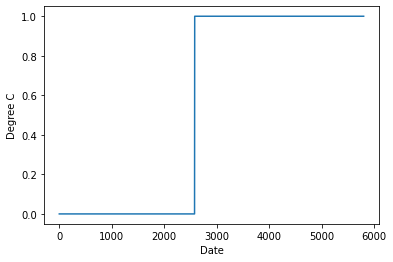

In [ ]:
plt.xlabel('Date')
plt.ylabel('Degree C')
plt.plot(parkinson[6])

In [ ]:
# So our data is scaled and normalized 
# We choose sequence length and extract X and y from it

In [ ]:
parkinson.shape

(5800, 7)

In [ ]:
# We should rename columns looking into names
parkinson.columns = ['X','Y','Z','Pressure','GripAngle','Timestamp','Test ID']


In [ ]:
normal_df.columns = ['X','Y','Z','Pressure','GripAngle','Timestamp','Test ID']

In [ ]:
normal_df

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
0,0.110134,-0.004057,-0.223100,-2.177774,1.217122,0.0,-1.117947
1,0.110134,-0.004057,-0.223100,-2.177773,1.163348,0.0,-1.117947
2,0.110134,-0.004057,-0.223100,-2.177769,1.163348,0.0,-1.117947
3,0.110134,-0.004057,-0.223100,-2.177741,1.163348,0.0,-1.117947
4,0.110134,-0.004057,-0.223100,-2.177636,1.163348,0.0,-1.117947
...,...,...,...,...,...,...,...
5795,1.920694,-0.047701,4.482288,-2.033023,-1.443918,0.0,0.894497
5796,1.920694,-0.047701,4.482288,-2.133598,-1.182877,0.0,0.894497
5797,1.920694,-0.047701,4.482288,-2.173987,-1.098753,0.0,0.894497
5798,1.920694,-0.058648,4.482288,-2.177765,-0.775448,0.0,0.894497


In [ ]:
scaled_parkinson2 = scaler.fit_transform(parkinson2)


In [ ]:
normal_parkinson2 = normalizer.fit_transform(parkinson2)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
normal_df2 = pd.DataFrame(normal_parkinson2,columns=['X','Y','Z','Pressure','GripAngle','Timestamp','Test ID'])

In [ ]:
normal_df2

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
0,0.059389,-0.075037,-0.239259,-4.400298,0.256380,0.0,-0.977509
1,0.059389,-0.075037,-0.239259,-4.245371,0.256380,0.0,-0.977509
2,0.059389,-0.075037,-0.239259,-4.027473,0.256380,0.0,-0.977509
3,0.059389,-0.075037,4.179574,-3.834998,0.256380,0.0,-0.977509
4,0.059389,-0.075037,-0.239259,-3.642309,0.256380,0.0,-0.977509
...,...,...,...,...,...,...,...
6810,1.861155,-0.064262,-0.239259,-1.901931,0.318483,0.0,1.023009
6811,1.861155,-0.064262,-0.239259,-2.410076,0.318483,0.0,1.023009
6812,1.853010,-0.064262,4.179574,-3.363534,0.063510,0.0,1.023009
6813,1.844860,-0.064262,4.179574,-4.159237,-0.003075,0.0,1.023009


In [ ]:
tot_df = normal_df.append(normal_df2)

In [ ]:
tot_df

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
0,0.110134,-0.004057,-0.223100,-2.177774,1.217122,0.0,-1.117947
1,0.110134,-0.004057,-0.223100,-2.177773,1.163348,0.0,-1.117947
2,0.110134,-0.004057,-0.223100,-2.177769,1.163348,0.0,-1.117947
3,0.110134,-0.004057,-0.223100,-2.177741,1.163348,0.0,-1.117947
4,0.110134,-0.004057,-0.223100,-2.177636,1.163348,0.0,-1.117947
...,...,...,...,...,...,...,...
6810,1.861155,-0.064262,-0.239259,-1.901931,0.318483,0.0,1.023009
6811,1.861155,-0.064262,-0.239259,-2.410076,0.318483,0.0,1.023009
6812,1.853010,-0.064262,4.179574,-3.363534,0.063510,0.0,1.023009
6813,1.844860,-0.064262,4.179574,-4.159237,-0.003075,0.0,1.023009


In [ ]:
tot_df.isnull().any()

X            False
Y            False
Z            False
Pressure     False
GripAngle    False
Timestamp    False
Test ID      False
dtype: bool

In [ ]:
hi i am back


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c4fa6ec-2909-45e0-804e-62050efaab95' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>